In [1]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data 


In [3]:
FundAUM=1e9

In [4]:
mkts=get_market_list()
curr_px=get_most_liquid_price(mkts)
df=pd.DataFrame()
for m in mkts:
    df[m]=get_timeseries(m)

# Portfolio with two different look backs with standard breakout models

* Models with 10 days and 80 days have the most diversification thus the most reduced drawdown

In [5]:
pos=tsmom_daily(df[mkts],10)
pnl_short=calc_pnl_wc(pos,df[mkts])
pos=tsmom_daily(df[mkts],80)
pnl_long=calc_pnl_wc(pos,df[mkts])
combined_pnl=(pnl_short*.5+pnl_long*.5)
scaling_factor=calc_scaling_factor(combined_pnl)
s_short=tsmom_daily_signal(df,10)
s_long=tsmom_daily_signal(df,80)
s_combined = (s_short*.5+s_long*.5)
lots=calc_position(s_combined,FundAUM,scaling_factor,curr_px)

model.py:8: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(256)
model.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=80,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:16: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(25

In [6]:
mul=get_contract_multipliers()[df.columns]
cost=cost_model_position(lots,curr_px,mul,fee=0.0003)

In [7]:
PNL = calc_pnl_position_wc(lots,df,curr_px,0.0003)/FundAUM

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


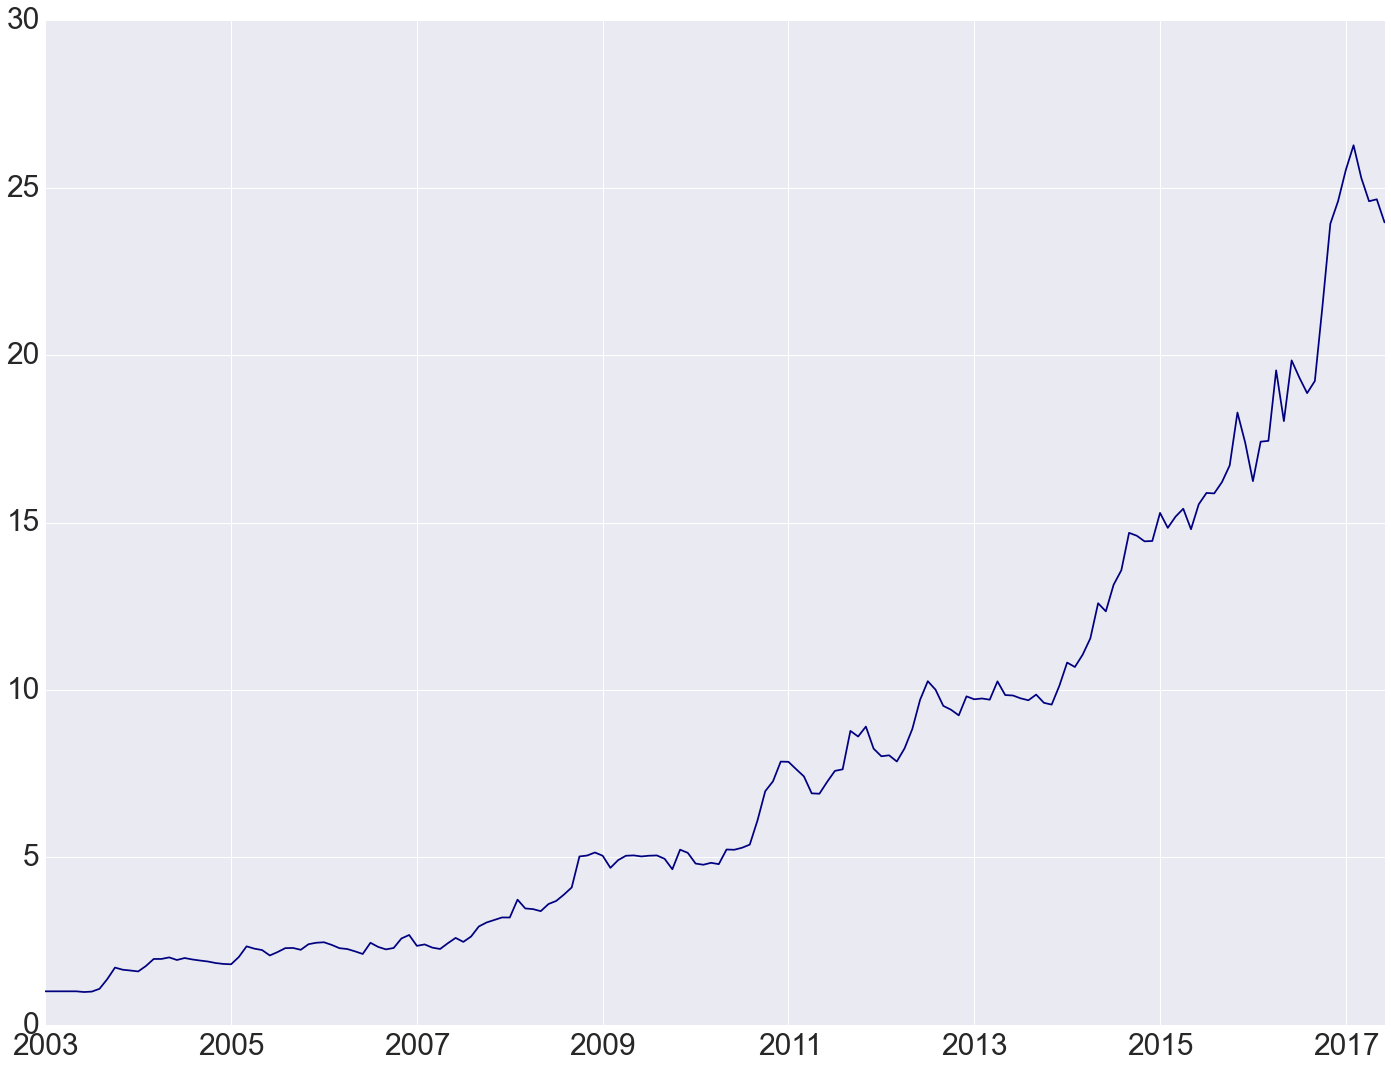

In [8]:
(PNL.sum(axis=1).resample(rule='m',how='sum')+1).cumprod().plot(colormap='jet')

In [41]:
HL=pd.read_csv('HL.csv',parse_dates=['Date']).set_index('Date').resample(rule='m',how='last')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


# Calculating fees

In [18]:
management_fee = 0.01
performance_fee = 0.2

In [19]:
gross_pnl=PNL.dropna(how='all').sum(axis=1).resample(rule='m',how='sum')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


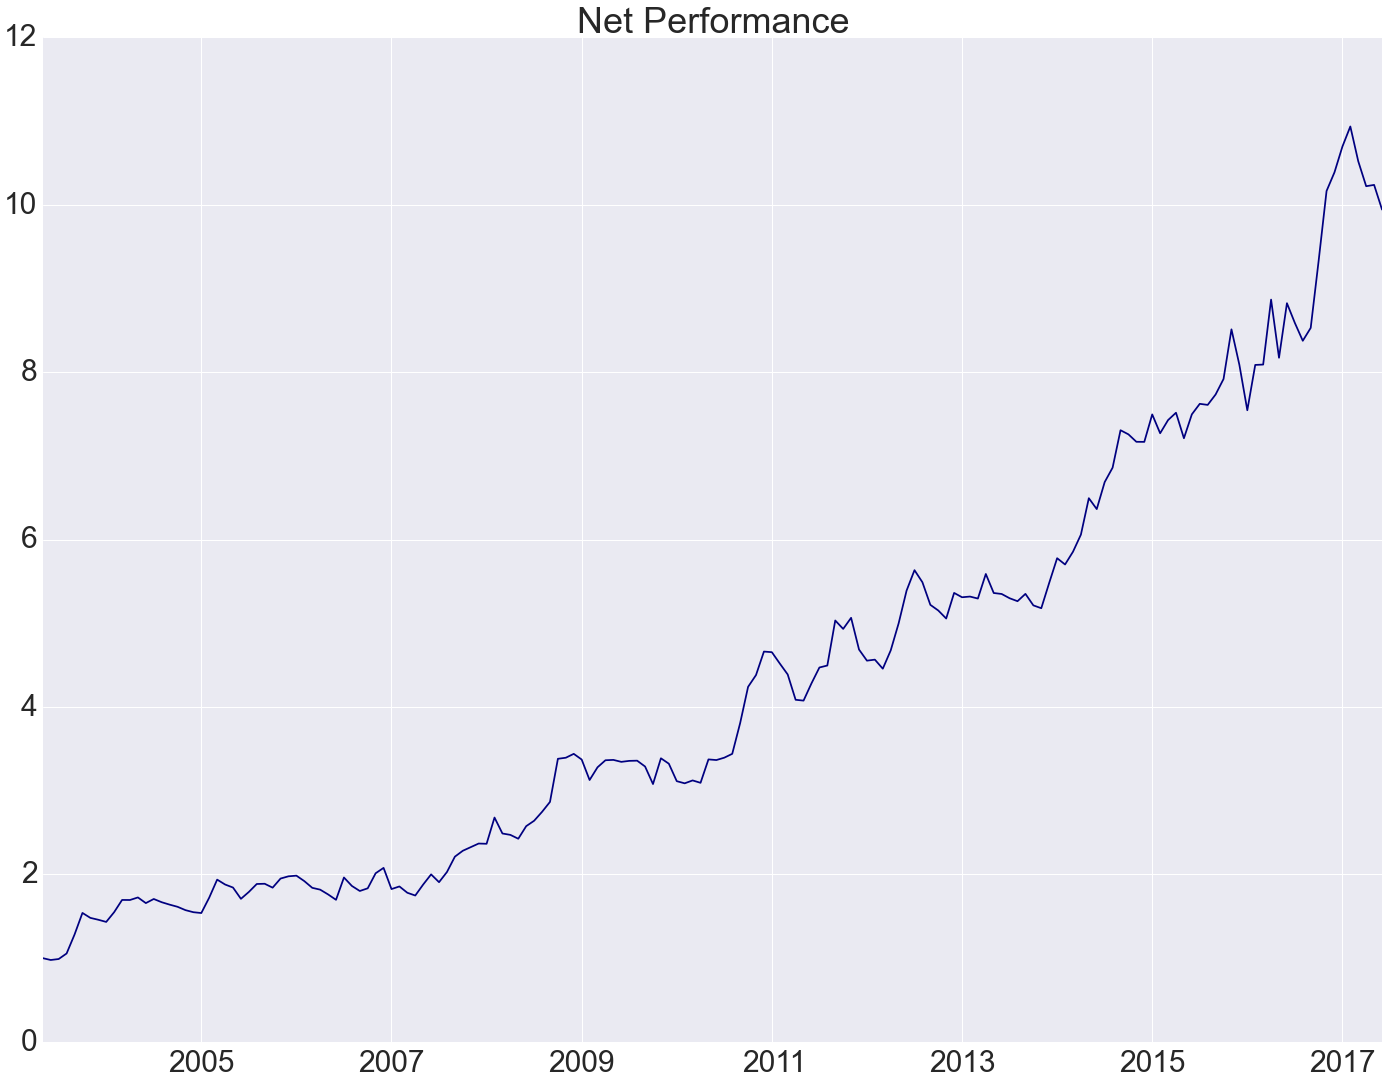

In [20]:
calc_net_performance(gross_pnl,management_fee,performance_fee).plot(colormap='jet',title='Net Performance')

In [21]:
x=calc_net_performance(gross_pnl,management_fee,performance_fee)

In [58]:
df=pd.DataFrame()
df['HL']=HL.SP
df['Net of fees'] =x[HL.index].dropna()

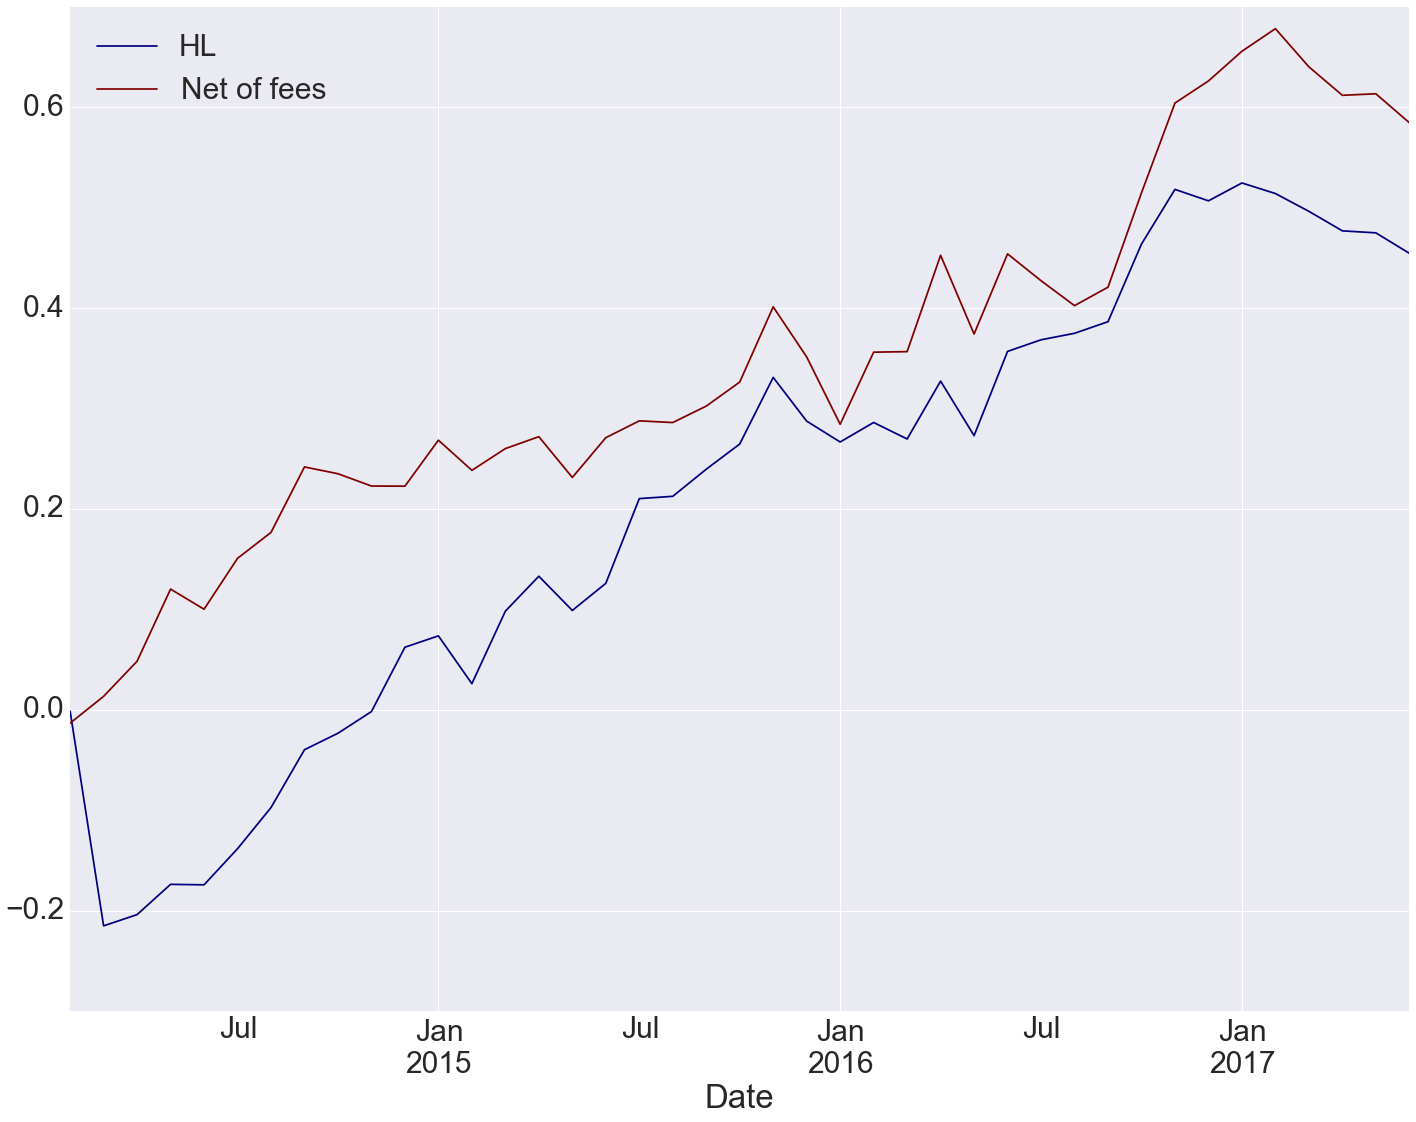

In [60]:
df.pct_change().cumsum().dropna().plot(colormap='jet')

In [66]:
df.pct_change().corr()

,HL,Net of fees
HL,1.000000,0.507634
Net of fees,0.507634,1.000000
